In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
col_na = [col for col in df.columns if df[col].isnull().sum() > 1]
col_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [8]:
for cols in col_na:
    print(f'{cols} has {np.round(df[cols].isnull().sum()/len(df)*100,2)} % missing values')

rate has 15.03 % missing values
phone has 2.34 % missing values
location has 0.04 % missing values
rest_type has 0.44 % missing values
dish_liked has 54.29 % missing values
cuisines has 0.09 % missing values
approx_cost(for two people) has 0.67 % missing values


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [11]:
df['approx_cost(for two people)'].dtype

dtype('O')

O indicates object type

In [12]:
df[df['approx_cost(for two people)'].isnull()]

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

In [13]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
## Using lambda get rid of commas

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [15]:
# or use a function:

def remove_comma(x):
    return x.replace(',','')
df['approx_cost(for two people)'].astype(str).apply(remove_comma)

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [16]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [17]:
# convert to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [18]:
# check dtype
df['approx_cost(for two people)'].dtype

dtype('float64')

In [19]:
# clean rate
df['rate'].dtype

dtype('O')

In [20]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
df['rate'].isnull().sum()

7775

In [22]:
df['rate'][0].split('/')[0]

'4.1'

In [23]:
def split(x):
    return x.split('/')[0]

In [24]:
# would not work without astype as it cannot split otherwise
df['rate'] = df['rate'].astype(str).apply(split)
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [25]:
# replace '-' with 0
# replace 'NEW' with 0 as it's a new restaurant and likely does not have ratings
df['rate'].replace('-', 0, inplace=True)
df['rate'].replace('NEW', 0, inplace=True)

In [26]:
df['rate'] = df['rate'].astype(float)

In [27]:
df['rate'].dtype

dtype('float64')

<AxesSubplot:>

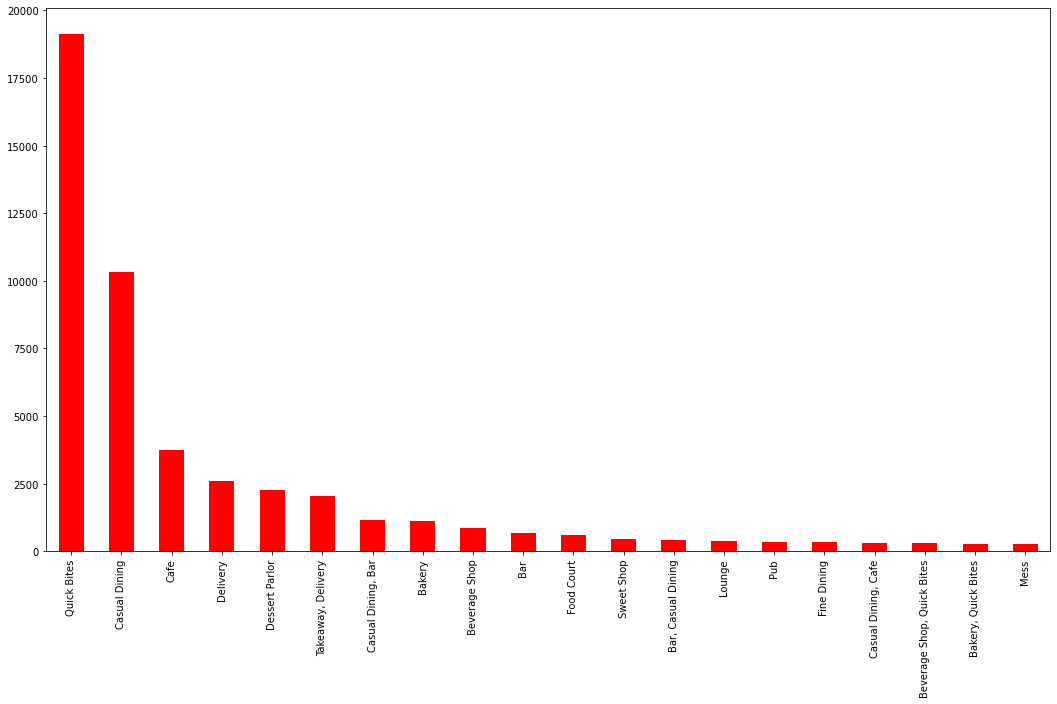

In [28]:
# explore restaurant types
plt.figure(figsize=(18,10))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')

In [29]:
def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'Quick Bites + Casual Dining'
    else:
        return 'others'

In [30]:
# apply the function
df['Top_types'] = df['rest_type'].apply(mark)

In [31]:
# check out new column
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    Top_types  
0          Buffet    Banashankari  Quick Bites + Casual Dining  
1          Buffet    Banashankari  Quick Bites + Casual Dining  
2          Buffet    Banashankari                       others  
3          Buffet    Banashankari  Quick Bites + Casual Dining  
4          Buffet    Banashankari  Quick Bites + Casual Dining

In [32]:
# !pip install plotly

In [33]:
import plotly.express as px

In [34]:
values = df['Top_types'].value_counts().values

In [35]:
labels = df['Top_types'].value_counts().index

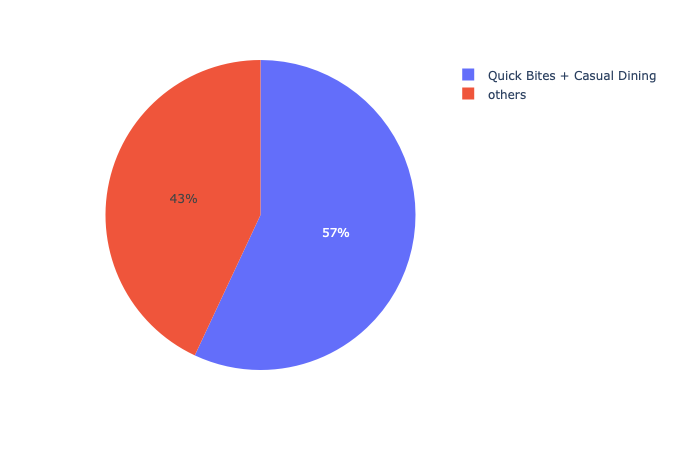

In [36]:
fig = px.pie(df, names=labels, values=values)
fig.show()

In [37]:
# Group data

df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [38]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

notice how votes is an integer

In [39]:
# pass dictionary into agg with key, value pairs
# store into a new dataframe

rest = df.groupby('name').agg({'votes': 'sum',
                        'url': 'count',
                        'approx_cost(for two people)': 'mean',
                        'rate': 'mean'}).reset_index()
rest

name  votes  url  \
0                                     #FeelTheROLL     14    2   
1                                       #L-81 Cafe    432    9   
2                                    #Vibes Restro      0    3   
3                                          #refuel    111    3   
4                           'Brahmins' Thatte Idli      0    1   
...                                            ...    ...  ...   
8787                                       late100      0    5   
8788                                       nu.tree   1443    8   
8789  re:cess - Hilton Bangalore Embassy GolfLinks    438    3   
8790                                    repEAT Hub      0    2   
8791                                     sCoolMeal      0    5   

      approx_cost(for two people)      rate  
0                           200.0  3.400000  
1                           400.0  3.900000  
2                           700.0       NaN  
3                           400.0  3.700000  
4                           100.0       NaN  
...                           ...       ...  
8787                        200.0       NaN  
8788                        400.0  4.314286  
8789                       1200.0  4.100000  
8790                        200.0       NaN  
8791                        300.0       NaN  

[8792 rows x 5 columns]

In [40]:
# manipulate new dataframe
rest.columns = ['name', 'total_votes', 
                'total_unities', 'avg_approx_cost',
                'mean_rating']

In [41]:
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  
0          3.4  
1          3.9  
2          NaN  
3          3.7  
4          NaN

In [42]:
# create new columns
rest['votes_per_unity'] = rest['total_votes']/rest['total_unities']

In [43]:
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  votes_per_unity  
0          3.4              7.0  
1          3.9             48.0  
2          NaN              0.0  
3          3.7             37.0  
4          NaN              0.0

In [44]:
# create new data frame which sorts values by total unities
popular = rest.sort_values(by='total_unities', ascending=False)
popular

name  total_votes  total_unities  \
1320                   Cafe Coffee Day         3089             96   
5549                            Onesta       347520             85   
3788                         Just Bake         2898             73   
2446                 Empire Restaurant       229808             71   
2577                 Five Star Chicken         3134             70   
...                                ...          ...            ...   
1900                        Cool Break           11              1   
8076       The Shake Factory Originals            8              1   
5216        Nethravathi Military Hotel            0              1   
7426  Swadisht North Indian Restaurant           23              1   
5375                Night Punjabi Folk            0              1   

      avg_approx_cost  mean_rating  votes_per_unity  
1320       844.791667     3.147191        32.177083  
5549       600.000000     4.410588      4088.470588  
3788       400.000000     3.355882        39.698630  
2446       685.211268     3.916901      3236.732394  
2577       257.857143     3.425000        44.771429  
...               ...          ...              ...  
1900       150.000000     3.400000        11.000000  
8076       200.000000     3.300000         8.000000  
5216       200.000000          NaN         0.000000  
7426       200.000000     3.200000        23.000000  
5375       200.000000          NaN         0.000000  

[8792 rows x 6 columns]

In [45]:
popular.shape

(8792, 6)

In [46]:
popular['name'].nunique()

8792

In [47]:
# perform restaurant overview analysis

In [48]:
# average votes recieved by restaurants
# top 5 most voted restaurants
# top 5 least voted restaurants

In [49]:
# access top 5 by head(5)
popular.sort_values(by='total_votes', 
            ascending=False).query('total_votes > 0').head(5)

name  total_votes  total_unities  avg_approx_cost  \
5549             Onesta       347520             85       600.000000   
8269           Truffles       301059             43       900.000000   
2446  Empire Restaurant       229808             71       685.211268   
3054           Hammered       180602             47      1272.340426   
7751    The Black Pearl       172122             18      1427.777778   

      mean_rating  votes_per_unity  
5549     4.410588      4088.470588  
8269     4.595349      7001.372093  
2446     3.916901      3236.732394  
3054     4.329787      3842.595745  
7751     4.727778      9562.333333

Text(0.5, 1.0, 'Top 5 least voted restaurants')

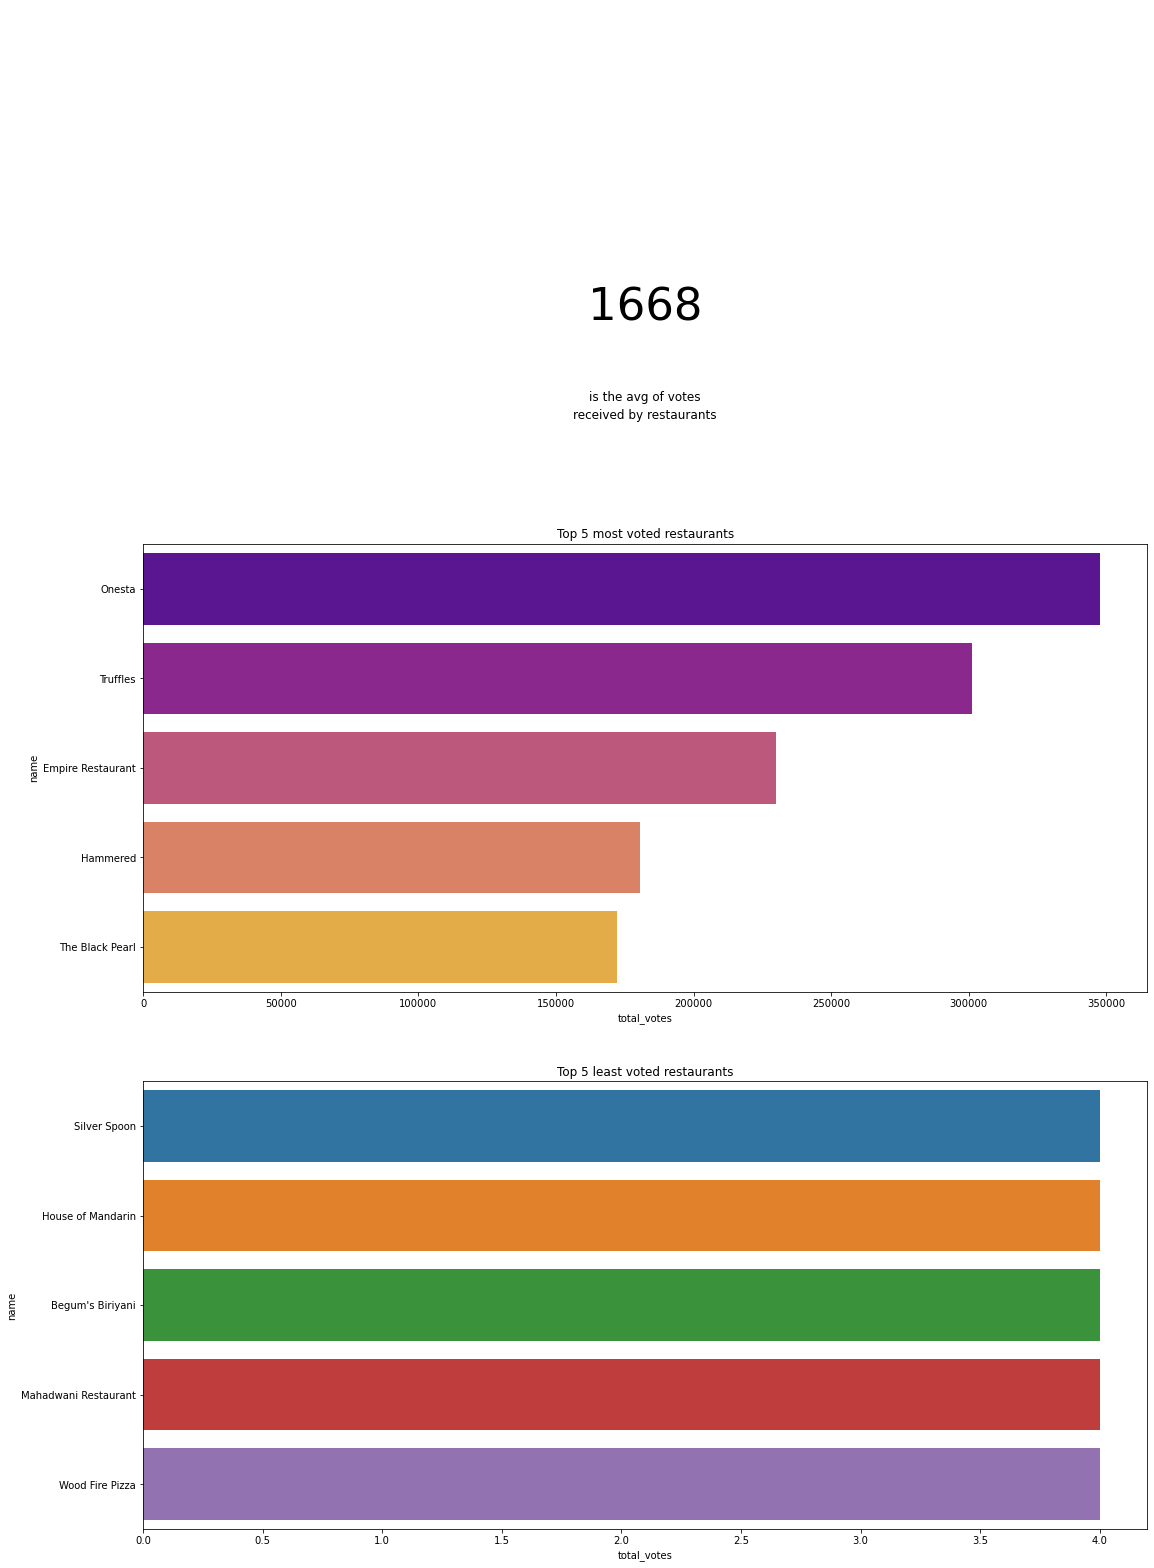

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 28))
ax1.text(0.50, 0.30, int(popular['total_votes'].mean()), 
         fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is the avg of votes', fontsize=12, ha='center')
ax1.text(0.50, 0.08, 'received by restaurants', fontsize=12 ,ha='center')
ax1.axis('off')

sns.barplot(x='total_votes', y='name', 
            data=popular.sort_values(by='total_votes', 
            ascending=False).query('total_votes > 0').head(5),ax=ax2, 
            palette='plasma')

ax2.set_title('Top 5 most voted restaurants')

sns.barplot(x='total_votes', y='name', 
            data=popular.sort_values(by='total_votes', 
            ascending=False).query('total_votes > 0').tail(5),ax=ax3)
ax3.set_title('Top 5 least voted restaurants')

Text(0.5, 1.0, 'Top 5 least expensive restaurants')

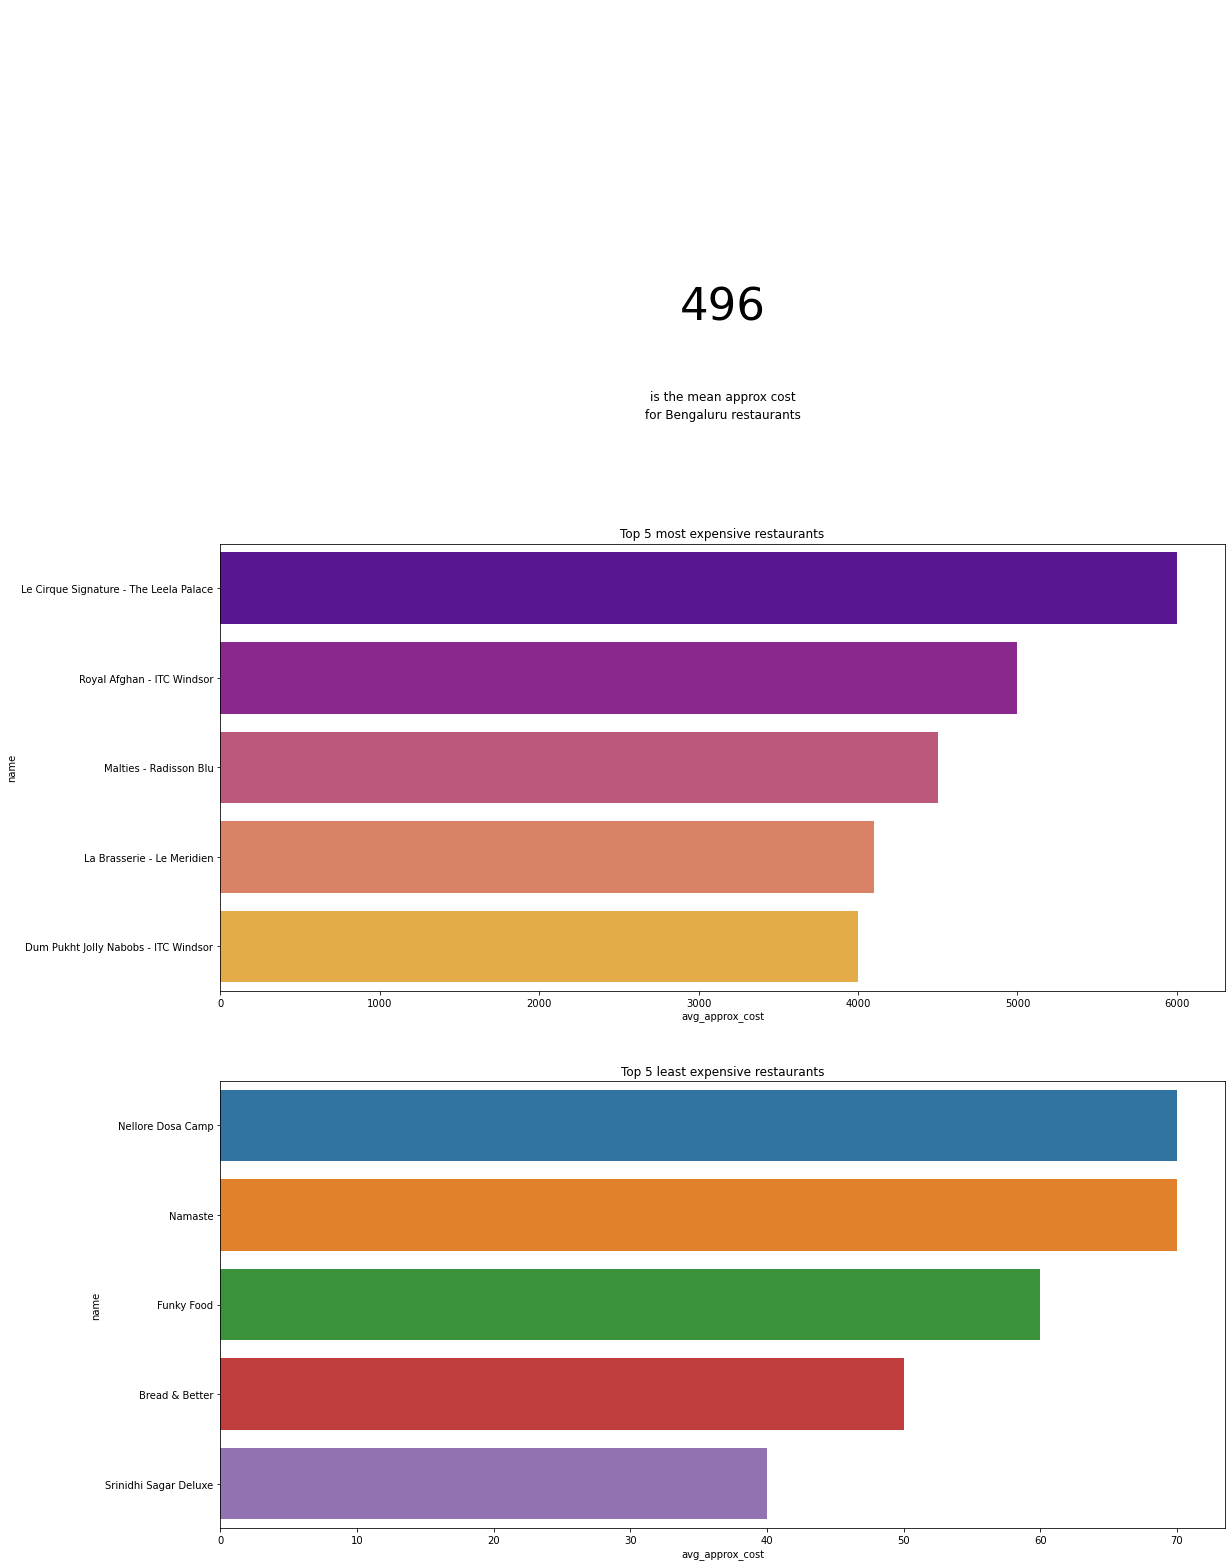

In [51]:
# analyze most expensive and least expensive restaurants

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 28))
ax1.text(0.50, 0.30, int(popular['avg_approx_cost'].mean()), 
         fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is the mean approx cost', fontsize=12, ha='center')
ax1.text(0.50, 0.08, 'for Bengaluru restaurants', fontsize=12 ,ha='center')
ax1.axis('off')

sns.barplot(x='avg_approx_cost', y='name', 
            data=popular.sort_values(by='avg_approx_cost', 
            ascending=False).query('avg_approx_cost > 0').head(5),ax=ax2, 
            palette='plasma')

ax2.set_title('Top 5 most expensive restaurants')

sns.barplot(x='avg_approx_cost', y='name', 
            data=popular.sort_values(by='avg_approx_cost', 
            ascending=False).query('avg_approx_cost > 0').tail(5),ax=ax3)
ax3.set_title('Top 5 least expensive restaurants')

In [52]:
# how many restaurants offer book table service and online

x = df['book_table'].value_counts()
labels = ['not booking', 'booking']

In [53]:
import plotly.graph_objs as go
from plotly.offline import iplot

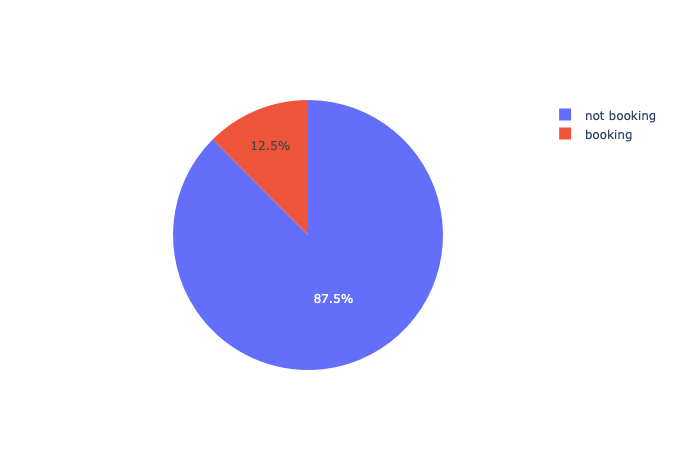

In [54]:
trace = go.Pie(labels=labels, values=x, 
               hoverinfo='label+percent',textinfo='percent')
iplot([trace])

In [55]:
# for online orders
x = df['online_order'].value_counts()
labels = ['accepted', 'not accepted']

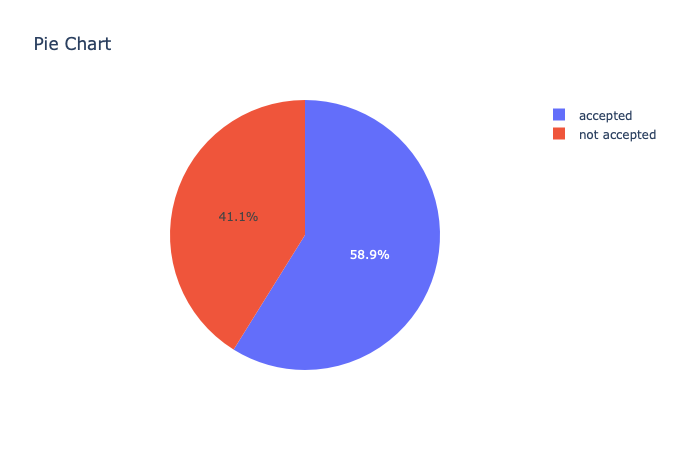

In [56]:
px.pie(df, values=x, names=labels, title='Pie Chart')

In [57]:
# find budget restaurants at any location

# create filter which defines budget
filter = (df['approx_cost(for two people)'] <= 400) & (df['location'] == 'BTM') & (df['rate'] >= 4) & (df['rest_type'] == 'Quick Bites')

# pass filter onto the original dataframe and store in a new dataframe
budget = df[filter]
budget.head()

url  \
928  https://www.zomato.com/bangalore/hiyar-majhe-k...   
934  https://www.zomato.com/bangalore/swadista-aaha...   
940  https://www.zomato.com/bangalore/swad-punjab-d...   
942  https://www.zomato.com/bangalore/roti-wala-btm...   
954  https://www.zomato.com/bangalore/litti-twist-b...   

                                               address                 name  \
928  57/1, Near Alliance University, 19th Cross, 7t...  Hiyar Majhe Kolkata   
934     947, 16th Main Road, 2nd Stage, BTM, Bangalore       Swadista Aahar   
940  324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...       Swad Punjab Da   
942  688, 7th Main, 10th Cross Main Road, 2nd Stage...            Roti Wala   
954  No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...          Litti Twist   

    online_order book_table  rate  votes                               phone  \
928          Yes         No   4.0    244  +91 9108919806\r\r\n+91 9739059571   
934          Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
940          Yes         No   4.0    126                      +91 8360151853   
942          Yes         No   4.0    197                      +91 9731100002   
954          Yes         No   4.1    464                      +91 8884270523   

    location    rest_type                                         dish_liked  \
928      BTM  Quick Bites  Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...   
934      BTM  Quick Bites  Panneer Butter Masala, Idli, Masala Dosa, Vada...   
940      BTM  Quick Bites    Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry   
942      BTM  Quick Bites  Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...   
954      BTM  Quick Bites  Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...   

                                             cuisines  \
928                             Bengali, North Indian   
934  South Indian, North Indian, Chinese, Street Food   
940                                      North Indian   
942                                      North Indian   
954                              North Indian, Bihari   

     approx_cost(for two people)  \
928                        400.0   
934                        300.0   
940                        150.0   
942                        300.0   
954                        300.0   

                                          reviews_list  \
928  [('Rated 4.0', 'RATED\n  I like this restauran...   
934  [('Rated 3.0', "RATED\n  Ordered south Indian ...   
940  [('Rated 4.0', 'RATED\n  If you can visit and ...   
942  [('Rated 5.0', 'RATED\n  Well, I never had a c...   
954  [('Rated 4.0', "RATED\n  It's a great outlet t...   

                                             menu_item listed_in(type)  \
928                                                 []        Delivery   
934                                                 []        Delivery   
940  ['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...        Delivery   
942                                                 []        Delivery   
954                                                 []        Delivery   

       listed_in(city)                    Top_types  
928  Bannerghatta Road  Quick Bites + Casual Dining  
934  Bannerghatta Road  Quick Bites + Casual Dining  
940  Bannerghatta Road  Quick Bites + Casual Dining  
942  Bannerghatta Road  Quick Bites + Casual Dining  
954  Bannerghatta Road  Quick Bites + Casual Dining

In [58]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [59]:
# Create a function which filters based on some inputs
def return_budget(location, restaurant_type):
    # create filter which defines budget
    filter = (df['approx_cost(for two people)'] <= 400) & (df['location'] == location) & (df['rate'] >= 4) & (df['rest_type'] == restaurant_type)
    # pass filter onto the original dataframe and store in a new dataframe
    budget = df[filter]
    return budget['name'].unique()

In [60]:
return_budget('BTM', 'Quick Bites')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [61]:
# extract longitude & latitude
# geographical analysis

# !pip insrall geopy

In [62]:
from geopy.geocoders import Nominatim

In [63]:
geolocator = Nominatim(user_agent='app')

In [64]:
data = df['name'][0]
data

'Jalsa'

In [65]:
data = geolocator.geocode(data)

In [66]:
data.latitude

12.9775851

In [67]:
data.longitude

77.6954241

In [68]:
df.shape

(51717, 18)

In [69]:
locations = pd.DataFrame({'Name': df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [70]:
lat = []
lon = []

for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [71]:
locations['latitude'] = lat
locations['longitude'] = lon

In [72]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [73]:
res_locations = df['location'].value_counts().reset_index()

In [74]:
res_locations.columns = ['Name', 'count']
res_locations

Name  count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88              Yelahanka      6
89         West Bangalore      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [75]:
restaurant_locations = res_locations.merge(locations, on = 'Name').dropna()
restaurant_locations

Name  count   latitude   longitude
0                     BTM   5124  45.954851 -112.496595
1                     HSR   2523  18.147500   41.538889
2   Koramangala 5th Block   2504  12.934377   77.628415
3                JP Nagar   2235  12.265594   76.646540
4              Whitefield   2144  44.373058  -71.611858
..                    ...    ...        ...         ...
88              Yelahanka      6  13.100698   77.596345
89         West Bangalore      6  12.875938   77.596100
90                 Jakkur      3  13.078474   77.606894
91   Rajarajeshwari Nagar      2  12.927441   77.515522
92                 Peenya      1  13.032942   77.527325

[92 rows x 4 columns]

In [76]:
import folium
from folium.plugins import HeatMap

In [77]:
base_map = folium.Map(location=[12.97, 77.59])
base_map

In [78]:
HeatMap(data = restaurant_locations[['latitude', 'longitude', 'count']]).add_to(base_map)

In [79]:
base_map

In [80]:
# wordcloud
from wordcloud import WordCloud, STOPWORDS

In [81]:
data =  df[df['rest_type'] == 'Quick Bites']

In [82]:
data.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                    Top_types  
3     Banashankari  Quick Bites + Casual Dining  
31    Banashankari  Quick Bites + Casual Dining  
34    Banashankari  Quick Bites + Casual Dining  
36    Banashankari  Quick Bites + Casual Dining  
39    Banashankari  Quick Bites + Casual Dining

In [83]:
dishes = ''
for word in data['dish_liked'].dropna():
    words = word.split()
    for i in range(len(words)):
        words[i] = words[i].lower()
    dishes = dishes + ' '.join(words)+ ' '

In [84]:
# dishes

In [85]:
stopwords = set(STOPWORDS)

In [86]:
wordcloud = WordCloud(stopwords = stopwords, width = 1500, height = 1500).generate(dishes)

(-0.5, 1499.5, 1499.5, -0.5)

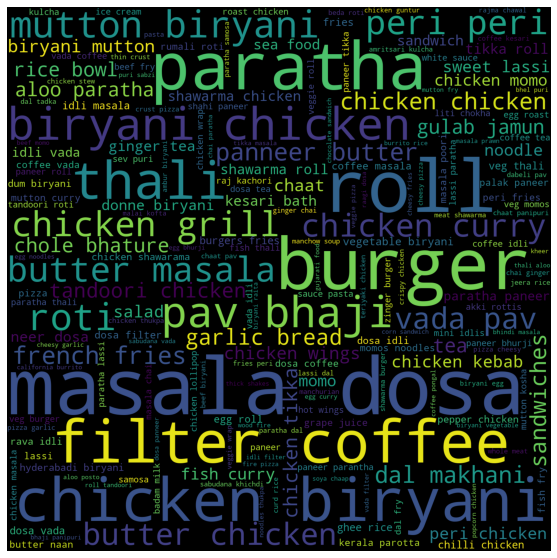

In [87]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

Analyzing reviews

In [88]:
data = df['reviews_list'][0]
data = data.lower()

In [89]:
# regex
import re

In [92]:
data2 = re.sub('[^a-zA-z]', ' ', data)
# data2

In [94]:
data3 = re.sub('rated', ' ', data2)
# data3

In [96]:
data4 = re.sub('x', ' ', data3)
# data4

In [98]:
data5 = re.sub(' +',' ', data4)
# data5

In [99]:
dataset = df[df['rest_type'] == 'Quick Bites']
dataset.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                    Top_types  
3     Banashankari  Quick Bites + Casual Dining  
31    Banashankari  Quick Bites + Casual Dining  
34    Banashankari  Quick Bites + Casual Dining  
36    Banashankari  Quick Bites + Casual Dining  
39    Banashankari  Quick Bites + Casual Dining

In [101]:
total_review = ' '

for review in dataset['reviews_list']:
    review = review.lower()
    review = re.sub('[^a-zA-z]', ' ', review)
    review = re.sub('rated', ' ', review)
    review = re.sub('x', ' ', review)
    review = re.sub(' +',' ', review)
    total_review = total_review + str(review)

In [102]:
wordcloud2 = WordCloud(stopwords = stopwords, width = 1500, height = 1500).generate(total_review)

(-0.5, 1499.5, 1499.5, -0.5)

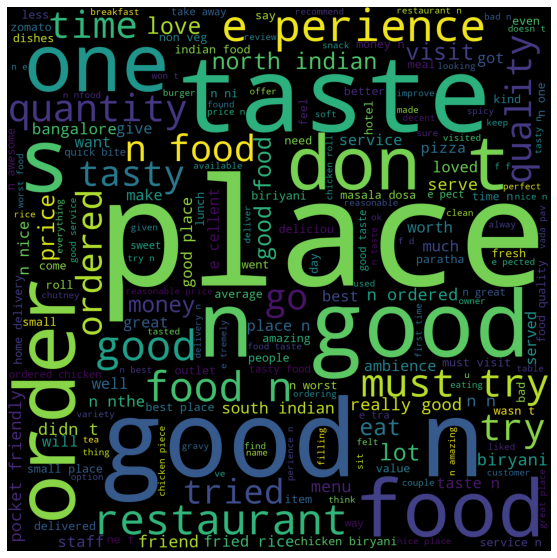

In [103]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis('off')

Machine Learning

In [104]:
def assign(x):
    if x > 0:
        return 1
    else:
        return 0

In [106]:
df['rated'] = df['rate'].apply(assign)

In [107]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [108]:
df['rated'].unique()

array([1, 0])

In [109]:
new_restaurants = df[df['rated'] == 0]
train_val_restaurants = df.query('rated == 1')

In [110]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    Top_types  rated  
0          Buffet    Banashankari  Quick Bites + Casual Dining      1  
1          Buffet    Banashankari  Quick Bites + Casual Dining      1  
2          Buffet    Banashankari                       others      1  
3          Buffet    Banashankari  Quick Bites + Casual Dining      1  
4          Buffet    Banashankari  Quick Bites + Casual Dining      1

In [112]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [114]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [117]:
# using function
def target(x):
    if x >= 3.75:
        return 1
    else:
        return 0

In [115]:
# using lambda
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x: 1 if x >= threshold else 0)

In [116]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites + Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites + Casual Dining      1       1  
2          Buffet    Banashankari                       others      1       1  
3          Buffet    Banashankari  Quick Bites + Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites + Casual Dining      1       1

In [119]:
x = train_val_restaurants['target'].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

In [121]:
labels = x.index
labels

Int64Index([0, 1], dtype='int64')

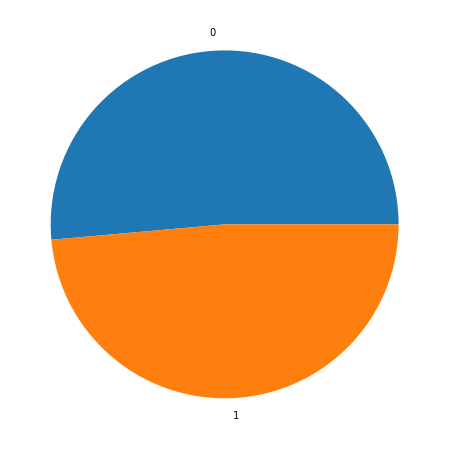

In [122]:
plt.figure(figsize=(8,8))
plt.pie(x, labels = labels)
plt.show()

As can be seen, there is not much imbalance and I can go ahead with my machine learning.